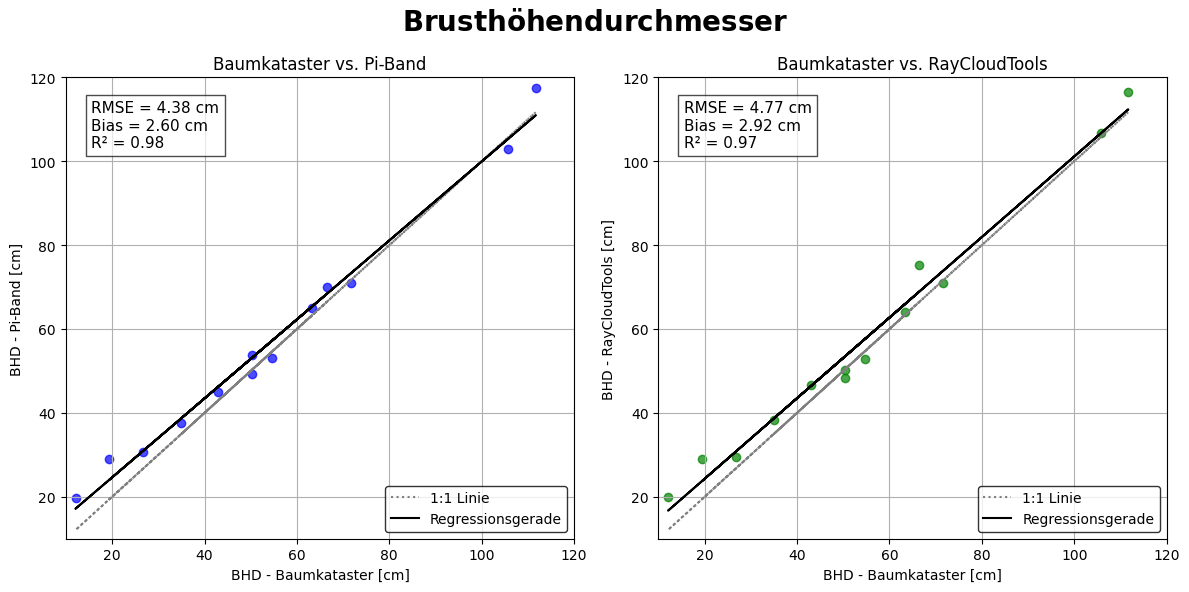

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Daten aus Datei laden
data_file = "data_filtered.json"
with open(data_file, "r") as file:
    data = json.load(file)

# Extrahiere Baumkataster, Pi-Band und RCT aus den Daten
baumkataster = [value[0] for value in data.values()]
pi_band = [value[1] for value in data.values()]
rct = [value[2] for value in data.values()]

# Funktion zur Berechnung von RMSE, Korrelationskoeffizient, R^2 und Bias
def calculate_metrics(data1, data2):
    rmse = np.sqrt(mean_squared_error(data1, data2))
    correlation, _ = pearsonr(data1, data2)
    r2 = r2_score(data1, data2)
    bias = np.mean(np.array(data2) - np.array(data1))
    return rmse, correlation, r2, bias

# Berechnungen
rmse_bk_pb, corr_bk_pb, r2_bk_pb, bias_bk_pb = calculate_metrics(baumkataster, pi_band)
rmse_bk_rct, corr_bk_rct, r2_bk_rct, bias_bk_rct = calculate_metrics(baumkataster, rct)

# Scatterplots erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Hauptüberschrift
fig.suptitle(r"$\bf{Brusth\"ohendurchmesser}$", fontsize=20, ha='center')

# Baumkataster vs. Pi-Band
axs[0].scatter(baumkataster, pi_band, color='blue', alpha=0.7)
axs[0].set_title("Baumkataster vs. Pi-Band", fontsize=12)
axs[0].set_xlabel("BHD - Baumkataster [cm]")
axs[0].set_ylabel("BHD - Pi-Band [cm]")
axs[0].grid()
axs[0].set_xlim(10, 120)
axs[0].set_ylim(10, 120)

# Regressionsgerade berechnen
slope_bk_pb, intercept_bk_pb = np.polyfit(baumkataster, pi_band, 1)
regression_line_bk_pb = np.polyval([slope_bk_pb, intercept_bk_pb], baumkataster)

# 1:1-Linie und Regressionsgerade
axs[0].plot(baumkataster, baumkataster, color='grey', linestyle=':', label="1:1 Linie")
axs[0].plot(baumkataster, regression_line_bk_pb, color='black', linestyle='-', label="Regressionsgerade")

# Werte im Plot anzeigen
axs[0].text(0.05, 0.95, f"RMSE = {rmse_bk_pb:.2f} cm\n"
                        f"Bias = {bias_bk_pb:.2f} cm\n"
                        f"R² = {r2_bk_pb:.2f}",
            transform=axs[0].transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
axs[0].legend(loc='lower right', edgecolor='black')

# Baumkataster vs. RCT
axs[1].scatter(baumkataster, rct, color='green', alpha=0.7)
axs[1].set_title("Baumkataster vs. RayCloudTools", fontsize=12)
axs[1].set_xlabel("BHD - Baumkataster [cm]")
axs[1].set_ylabel("BHD - RayCloudTools [cm]")
axs[1].grid()
axs[1].set_xlim(10, 120)
axs[1].set_ylim(10, 120)

slope_bk_rct, intercept_bk_rct = np.polyfit(baumkataster, rct, 1)
regression_line_bk_rct = np.polyval([slope_bk_rct, intercept_bk_rct], baumkataster)

axs[1].plot(baumkataster, baumkataster, color='grey', linestyle=':', label="1:1 Linie")
axs[1].plot(baumkataster, regression_line_bk_rct, color='black', linestyle='-', label="Regressionsgerade")
axs[1].text(0.05, 0.95, f"RMSE = {rmse_bk_rct:.2f} cm\n"
                        f"Bias = {bias_bk_rct:.2f} cm\n"
                        f"R² = {r2_bk_rct:.2f}",
            transform=axs[1].transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
axs[1].legend(loc='lower right', edgecolor='black')

# Abstände zwischen den Plots anpassen
plt.tight_layout()
plt.savefig("BHD_vergleich.png", dpi=300)
plt.show()
